In [2]:
from numpy import random
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from PIL import Image
PATH = "img/"

In [3]:
sample_size = [20,100]
loc, scale = 0.0, 1.0
EXP_NUM = 4

In [6]:
def norm(size):
    return random.normal(loc, scale, size)

def cauchy(size):
    return random.standard_cauchy(size)

def laplace(size):
    return random.laplace(loc, 1 / np.sqrt(2), size)

def poisson(size):
    return random.poisson(10, size)

def uniform(size):
    return  random.uniform(-np.sqrt(3), np.sqrt(3), size)

distribution_fun = { 'norm' : norm,
                     'cauchy' : cauchy,
                     'laplace' : laplace,
                     'poisson' : poisson,
                     'uniform' : uniform, }

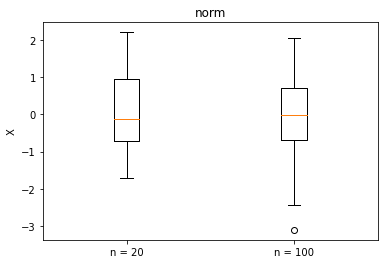

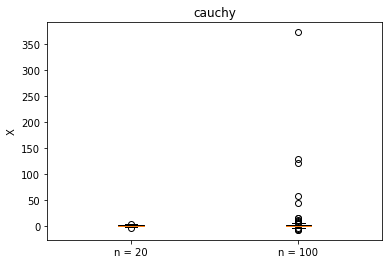

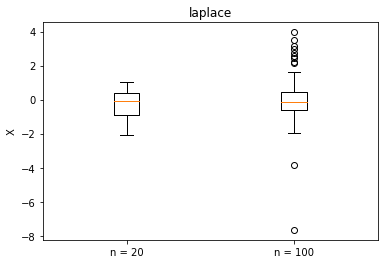

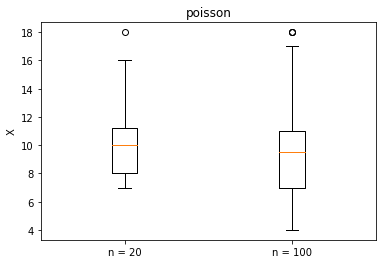

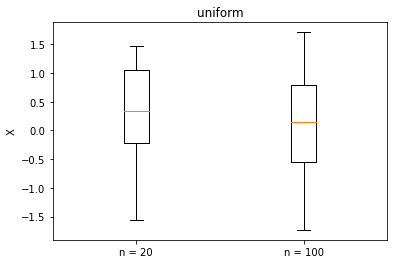

In [7]:
for dist in distribution_fun:
    sample_20 = distribution_fun[dist](20)
    sample_100 = distribution_fun[dist](100)
    plt.boxplot((sample_20, sample_100), labels=["n = 20", "n = 100"])
    plt.ylabel("X")
    plt.title(dist)
    plt.show()
    
